Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.6275 - val_loss: 0.5541
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.5722 - val_loss: 0.5521
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5746 - val_loss: 0.5516
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5734 - val_loss: 0.5513
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5698 - val_loss: 0.5512
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5704 - val_loss: 0.5510
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5642 - val_loss: 0.5507
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5673 - val_loss: 0.5512
Epoch 9/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5767 - val_loss: 0.5508
Epoch 10/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5703 - val_loss: 0.5507
Epoch 11/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.5623 - val_loss: 0.5506
Epoch 12/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step

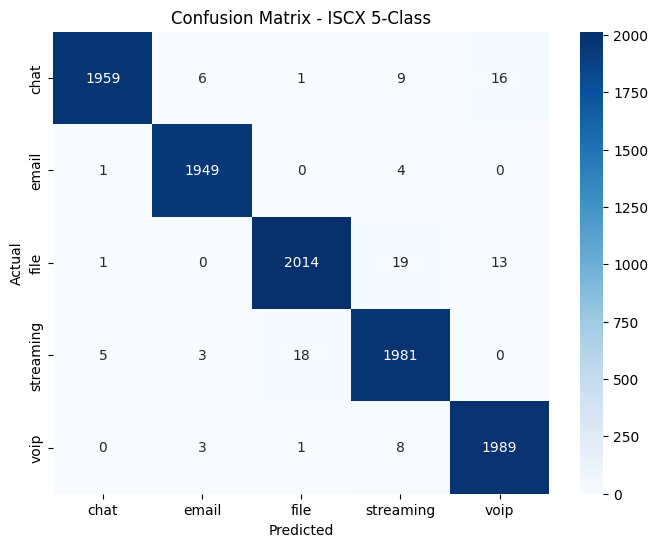

In [ ]:
# -*- coding: utf-8 -*-
"""
Experiment 1 - ISCX 5-Class Dataset
Feature Extraction using Autoencoder (VAE) + CNN Classification
"""

import numpy as np
import pandas as pd
import time
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Convolution1D, MaxPooling1D, Flatten, Reshape
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Labels for ISCX 5-Class dataset
LABELS_ISCX = ['chat', 'email', 'file', 'streaming', 'voip']

# Load ISCX dataset
df_ISCX = pd.read_csv('ISCX_5class_each_normalized_cuttedfloefeature.csv')

# Extract features and labels
X_ISCX = df_ISCX.iloc[:, 1:].values  # Exclude first column (assuming it's an index)
Y_ISCX = df_ISCX["label"].values     # Target labels

# Normalize data
scaler = StandardScaler()
X_ISCX = scaler.fit_transform(X_ISCX)

# Split dataset
x_train, x_test, y_train, y_test = train_test_split(X_ISCX, Y_ISCX, test_size=0.1, random_state=5)

# Convert labels to categorical (one-hot encoding)
num_classes = len(set(Y_ISCX))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define Autoencoder (VAE) for Feature Extraction
latent_dim = 39
input_dim = X_ISCX.shape[1]

# Encoder
input_e = Input(shape=(input_dim,))
x = Dense(512, activation="relu")(input_e)
x = Dense(256, activation="relu")(x)
x = Dense(latent_dim, activation="relu")(x)
encoder = Model(input_e, x, name="encoder")

# Decoder
input_d = Input(shape=(latent_dim,))
x = Dense(256, activation="relu")(input_d)
x = Dense(512, activation="relu")(x)
x = Dense(input_dim, activation="sigmoid")(x)
decoder = Model(input_d, x, name="decoder")

# Combine Autoencoder
autoencoder = Model(input_e, decoder(encoder(input_e)))
autoencoder.compile(optimizer="adam", loss="mse")

# Train Autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, validation_data=(x_test, x_test))

# Extract Features
x_train_encoded = encoder.predict(x_train)
x_test_encoded = encoder.predict(x_test)

# Define CNN Classifier
input_c = Input(shape=(latent_dim,))
x = Dense(128, activation="relu")(input_c)
x = Dense(64, activation="relu")(x)
x = Dense(num_classes, activation="softmax")(x)
cnn = Model(input_c, x, name="CNN_classifier")
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train CNN
cnn.fit(x_train_encoded, y_train, epochs=50, batch_size=128, validation_data=(x_test_encoded, y_test))

# Evaluate CNN
y_pred = cnn.predict(x_test_encoded)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Print classification report
print("Classification Report:\n", classification_report(y_true_labels, y_pred_labels, target_names=LABELS_ISCX))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=LABELS_ISCX, yticklabels=LABELS_ISCX)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - ISCX 5-Class")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0: D Loss = 0.6925, D Acc = 0.5547, G Loss = 0.6606
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26

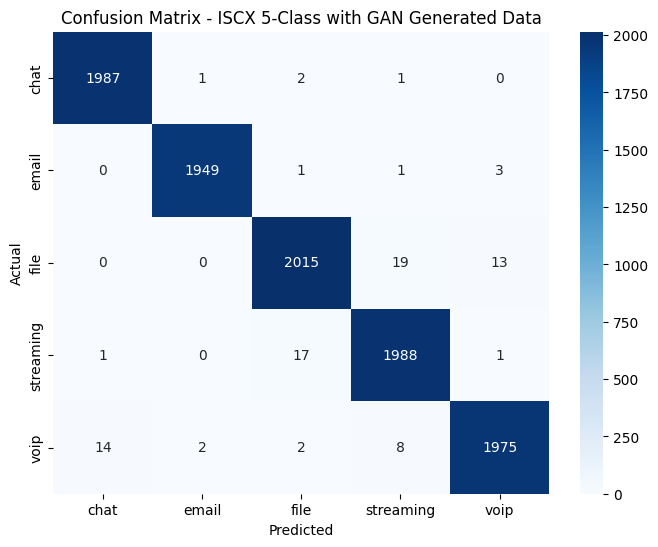

In [ ]:
# -*- coding: utf-8 -*-
"""
Experiment 1 - ISCX 5-Class Dataset
Synthetic Data Generation using GANs
"""

import numpy as np
import pandas as pd
import time
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Labels for ISCX 5-Class dataset
LABELS_ISCX = ['chat', 'email', 'file', 'streaming', 'voip']

# Load ISCX dataset
df_ISCX = pd.read_csv('ISCX_5class_each_normalized_cuttedfloefeature.csv')

# Extract features and labels
X_ISCX = df_ISCX.iloc[:, 1:].values  # Exclude first column (assuming it's an index)
Y_ISCX = df_ISCX["label"].values     # Target labels

# Normalize data
scaler = StandardScaler()
X_ISCX = scaler.fit_transform(X_ISCX)

# Split dataset
x_train, x_test, y_train, y_test = train_test_split(X_ISCX, Y_ISCX, test_size=0.1, random_state=5)

# Convert labels to categorical (one-hot encoding)
num_classes = len(set(Y_ISCX))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# GAN Parameters
latent_dim = 100  # Size of noise vector

# Generator Model
def build_generator():
    input_g = Input(shape=(latent_dim,))
    x = Dense(256)(input_g)
    x = LeakyReLU(negative_slope=0.2)(x)
    x = Dense(512)(x)
    x = LeakyReLU(negative_slope=0.2)(x)
    x = Dense(X_ISCX.shape[1], activation="tanh")(x)  # Output same size as features
    generator = Model(input_g, x, name="Generator")
    return generator

# Discriminator Model
def build_discriminator():
    input_d = Input(shape=(X_ISCX.shape[1],))
    x = Dense(512)(input_d)
    x = LeakyReLU(negative_slope=0.2)(x)
    x = Dense(256)(x)
    x = LeakyReLU(negative_slope=0.2)(x)
    x = Dense(1, activation="sigmoid")(x)  # Binary classification (Real or Fake)
    discriminator = Model(input_d, x, name="Discriminator")
    return discriminator

# Build and Compile GAN
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5), metrics=["accuracy"])

# Combine into GAN
discriminator.trainable = False  # Freeze discriminator when training GAN
gan_input = Input(shape=(latent_dim,))
fake_data = generator(gan_input)
gan_output = discriminator(fake_data)
gan = Model(gan_input, gan_output)
gan.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5))

# Training GAN
epochs = 500
batch_size = 64
half_batch = batch_size // 2

for epoch in range(epochs):
    # Train Discriminator
    idx = np.random.randint(0, x_train.shape[0], half_batch)
    real_data = x_train[idx]

    noise = np.random.normal(0, 1, (half_batch, latent_dim))
    generated_data = generator.predict(noise)

    d_loss_real = discriminator.train_on_batch(real_data, np.ones((half_batch, 1)))
    d_loss_fake = discriminator.train_on_batch(generated_data, np.zeros((half_batch, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print Training Progress
    if epoch % 50 == 0:
        print(f"Epoch {epoch}: D Loss = {d_loss[0]:.4f}, D Acc = {d_loss[1]:.4f}, G Loss = {g_loss:.4f}")

# Generate Synthetic Data
num_samples = 5000  # Number of synthetic samples
noise = np.random.normal(0, 1, (num_samples, latent_dim))
synthetic_data = generator.predict(noise)

# Assign random labels to synthetic data (for semi-supervised learning)
synthetic_labels = np.random.randint(0, num_classes, num_samples)
synthetic_labels = tf.keras.utils.to_categorical(synthetic_labels, num_classes)

# Combine with real data
X_combined = np.vstack((x_train, synthetic_data))
Y_combined = np.vstack((y_train, synthetic_labels))

# Train CNN with Synthetic Data
input_c = Input(shape=(X_ISCX.shape[1],))
x = Dense(128, activation="relu")(input_c)
x = Dense(64, activation="relu")(x)
x = Dense(num_classes, activation="softmax")(x)
cnn = Model(input_c, x, name="CNN_classifier")
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

cnn.fit(X_combined, Y_combined, epochs=50, batch_size=128, validation_data=(x_test, y_test))

# Evaluate CNN
y_pred = cnn.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Print classification report
print("Classification Report:\n", classification_report(y_true_labels, y_pred_labels, target_names=LABELS_ISCX))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=LABELS_ISCX, yticklabels=LABELS_ISCX)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - ISCX 5-Class with GAN Generated Data")
plt.show()


proper

Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.6275 - val_loss: 0.5549
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5700 - val_loss: 0.5539
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5677 - val_loss: 0.5533
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5834 - val_loss: 0.5533
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5607 - val_loss: 0.5534
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5571 - val_loss: 0.5538
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5679 - val_loss: 0.5528
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5687 - val_loss: 0.5528
Epoch 9/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5713 - val_loss: 0.5527
Epoch 10/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5770 - val_loss: 0.5528
Epoch 11/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5601 - val_loss: 0.5525
Epoch 12/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step

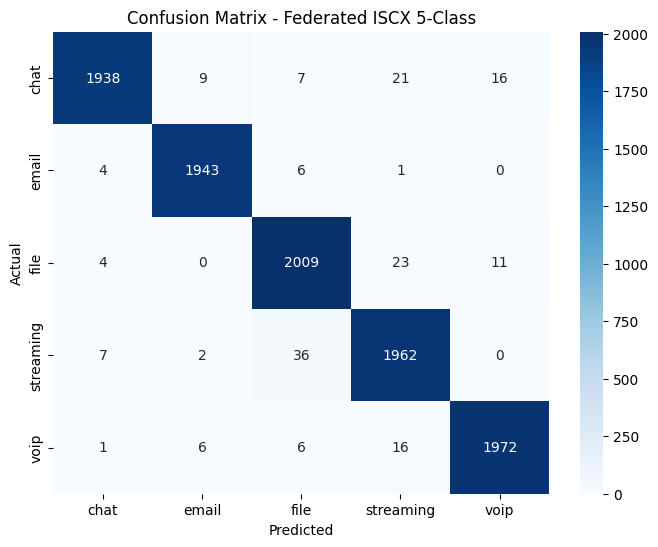

In [ ]:
# -*- coding: utf-8 -*-
"""
Federated Learning - ISCX 5-Class Dataset
Feature Extraction using Autoencoder (VAE) + CNN Classification with Fixes
"""

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Labels for ISCX 5-Class dataset
LABELS_ISCX = ['chat', 'email', 'file', 'streaming', 'voip']
num_classes = len(LABELS_ISCX)

# 🔹 Load ISCX dataset
df_ISCX = pd.read_csv('ISCX_5class_each_normalized_cuttedfloefeature.csv')

# 🔹 Extract features and labels
X_ISCX = df_ISCX.iloc[:, 1:].values  # Exclude first column (assuming it's an index)
Y_ISCX = df_ISCX["label"].values     # Target labels

# 🔹 Normalize data
scaler = StandardScaler()
X_ISCX = scaler.fit_transform(X_ISCX)

# 🔹 Split dataset
x_train, x_test, y_train, y_test = train_test_split(X_ISCX, Y_ISCX, test_size=0.1, random_state=5)

# 🔹 Convert labels to categorical (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# 🔹 Define Autoencoder (VAE) for Feature Extraction
latent_dim = 39
input_dim = X_ISCX.shape[1]

# 🔹 Encoder
input_e = Input(shape=(input_dim,))
x = Dense(512, activation="relu")(input_e)
x = Dense(256, activation="relu")(x)
x = Dense(latent_dim, activation="relu")(x)
encoder = Model(input_e, x, name="encoder")

# 🔹 Decoder
input_d = Input(shape=(latent_dim,))
x = Dense(256, activation="relu")(input_d)
x = Dense(512, activation="relu")(x)
x = Dense(input_dim, activation="sigmoid")(x)
decoder = Model(input_d, x, name="decoder")

# 🔹 Combine Autoencoder
autoencoder = Model(input_e, decoder(encoder(input_e)))
autoencoder.compile(optimizer="adam", loss="mse")

# 🔹 Train Autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, validation_data=(x_test, x_test))

# 🔹 Extract Features
x_train_encoded = encoder.predict(x_train)
x_test_encoded = encoder.predict(x_test)

# 🔹 Federated Learning Setup
num_clients = 5
client_data_size = len(x_train) // num_clients
client_models = []

# 🔹 Define CNN Classifier
def create_classifier():
    input_c = Input(shape=(latent_dim,))
    x = Dense(128, activation="relu")(input_c)
    x = Dense(64, activation="relu")(x)
    x = Dense(num_classes, activation="softmax")(x)
    model = Model(input_c, x, name="CNN_classifier")
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# 🔹 Create Global Model
global_model = create_classifier()

# 🔹 Split Data Among Clients
encoded_client_data = np.array_split(x_train_encoded, num_clients)
client_labels = np.array_split(y_train, num_clients)

# 🔹 Train Local Models
for i in range(num_clients):
    local_model = create_classifier()  # 🔹 Ensure each client gets a compiled model
    local_model.set_weights(global_model.get_weights())  # 🔹 Start with global model weights
    local_model.fit(encoded_client_data[i], client_labels[i], epochs=20, batch_size=32, verbose=0)
    client_models.append(local_model)

# 🔹 Federated Averaging (FedAvg)
def fed_avg(models):
    """Perform Federated Averaging"""
    client_weights = [np.array(model.get_weights(), dtype=object) for model in models]
    avg_weights = np.mean(client_weights, axis=0)
    return avg_weights

# 🔹 Update Global Model
global_model.set_weights(fed_avg(client_models))

# 🔹 Evaluate Global Model
y_pred = global_model.predict(x_test_encoded)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# 🔹 Print Classification Report
print("\n📌 Global Model - Classification Report:")
print(classification_report(y_true_labels, y_pred_labels, target_names=LABELS_ISCX))

# 🔹 Confusion Matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=LABELS_ISCX, yticklabels=LABELS_ISCX)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Federated ISCX 5-Class")
plt.show()



📌 Training Autoencoder...
Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.6082 - val_loss: 0.5593
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5750 - val_loss: 0.5577
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5524 - val_loss: 0.5578
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5762 - val_loss: 0.5572
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5601 - val_loss: 0.5568
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5786 - val_loss: 0.5568
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5698 - val_loss: 0.5552
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5690 - val_loss: 0.5551
Epoch 9/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5674 - val_loss: 0.5551
Epoch 10/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5741 - val_loss: 0.5545
Epoch 11/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.5739 - val_loss: 0.5546
Epoch 12/50
704/704 ━━━━━

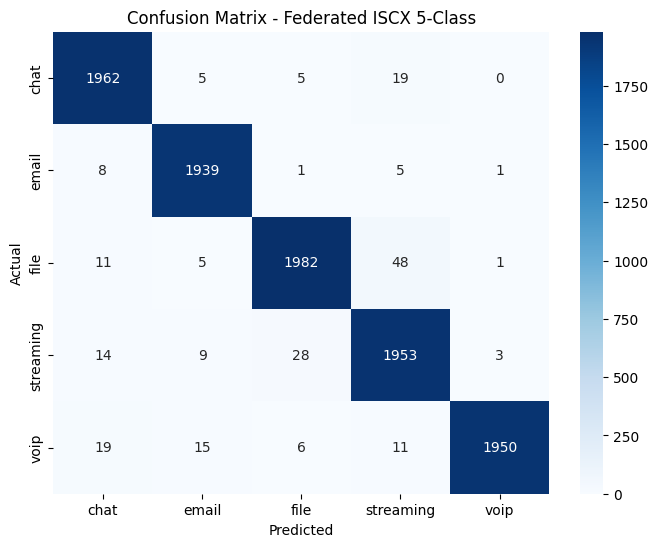

In [ ]:
# -*- coding: utf-8 -*-
"""
Federated Learning - ISCX 5-Class Dataset
Feature Extraction using Autoencoder (VAE) + CNN Classification
"""

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Labels for ISCX 5-Class dataset
LABELS_ISCX = ['chat', 'email', 'file', 'streaming', 'voip']
num_classes = len(LABELS_ISCX)

# 🔹 Load ISCX dataset
df_ISCX = pd.read_csv('ISCX_5class_each_normalized_cuttedfloefeature.csv')

# 🔹 Extract features and labels
X_ISCX = df_ISCX.iloc[:, 1:].values  # Exclude first column
Y_ISCX = df_ISCX["label"].values     # Target labels

# 🔹 Normalize data
scaler = StandardScaler()
X_ISCX = scaler.fit_transform(X_ISCX)

# 🔹 Split dataset
x_train, x_test, y_train, y_test = train_test_split(X_ISCX, Y_ISCX, test_size=0.1, random_state=5)

# 🔹 Convert labels to categorical (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# 🔹 Define Autoencoder (VAE) for Feature Extraction
latent_dim = 39
input_dim = X_ISCX.shape[1]

# 🔹 Encoder
input_e = Input(shape=(input_dim,))
x = Dense(512, activation="relu")(input_e)
x = Dense(256, activation="relu")(x)
x = Dense(latent_dim, activation="relu")(x)
encoder = Model(input_e, x, name="encoder")

# 🔹 Decoder
input_d = Input(shape=(latent_dim,))
x = Dense(256, activation="relu")(input_d)
x = Dense(512, activation="relu")(x)
x = Dense(input_dim, activation="sigmoid")(x)
decoder = Model(input_d, x, name="decoder")

# 🔹 Combine Autoencoder
autoencoder = Model(input_e, decoder(encoder(input_e)))
autoencoder.compile(optimizer="adam", loss="mse")

# 🔹 Train Autoencoder
print("\n📌 Training Autoencoder...")
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, validation_data=(x_test, x_test), verbose=1)

# 🔹 Extract Features
x_train_encoded = encoder.predict(x_train)
x_test_encoded = encoder.predict(x_test)

# 🔹 Federated Learning Setup
num_clients = 5
client_data_size = len(x_train) // num_clients
client_models = []

# 🔹 Define CNN Classifier
def create_classifier():
    input_c = Input(shape=(latent_dim,))
    x = Dense(128, activation="relu")(input_c)
    x = Dense(64, activation="relu")(x)
    x = Dense(num_classes, activation="softmax")(x)
    model = Model(input_c, x, name="CNN_classifier")
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# 🔹 Create Global Model
global_model = create_classifier()

# 🔹 Split Data Among Clients
encoded_client_data = np.array_split(x_train_encoded, num_clients)
client_labels = np.array_split(y_train, num_clients)

# 🔹 Train Local Models
for i in range(num_clients):
    print(f"\n📌 Training Client {i+1} Model...")
    local_model = create_classifier()  # 🔹 Ensure each client gets a compiled model
    local_model.set_weights(global_model.get_weights())  # 🔹 Start with global model weights
    local_model.fit(encoded_client_data[i], client_labels[i], epochs=5, batch_size=32, verbose=1)
    client_models.append(local_model)

# 🔹 Federated Averaging (FedAvg)
def fed_avg(models):
    """Perform Federated Averaging"""
    client_weights = [np.array(model.get_weights(), dtype=object) for model in models]
    avg_weights = np.mean(client_weights, axis=0)
    return avg_weights

# 🔹 Update Global Model
global_model.set_weights(fed_avg(client_models))

# 🔹 Evaluate Global Model
y_pred = global_model.predict(x_test_encoded)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# 🔹 Print Classification Report
print("\n📌 Global Model - Classification Report:")
print(classification_report(y_true_labels, y_pred_labels, target_names=LABELS_ISCX))

# 🔹 Confusion Matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=LABELS_ISCX, yticklabels=LABELS_ISCX)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Federated ISCX 5-Class")
plt.show()


In [ ]:
# -*- coding: utf-8 -*-
"""
Federated Learning - GAN-based Synthetic Data Generation
"""

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 Labels for ISCX 5-Class dataset
LABELS_ISCX = ['chat', 'email', 'file', 'streaming', 'voip']

# 📌 Load ISCX dataset
df_ISCX = pd.read_csv('ISCX_5class_each_normalized_cuttedfloefeature.csv')

# 📌 Extract features & labels
X_ISCX = df_ISCX.iloc[:, 1:].values  # Exclude first column
Y_ISCX = df_ISCX["label"].values     # Target labels

# 📌 Normalize data
scaler = StandardScaler()
X_ISCX = scaler.fit_transform(X_ISCX)

# 📌 Split dataset (90% train, 10% test)
x_train, x_test, y_train, y_test = train_test_split(X_ISCX, Y_ISCX, test_size=0.1, stratify=Y_ISCX, random_state=5)

# 📌 Convert labels to categorical (one-hot encoding)
num_classes = len(set(Y_ISCX))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Federated Learning Parameters
NUM_CLIENTS = 10
EPOCHS = 100
BATCH_SIZE = 64
latent_dim = 100

# ==========================
# 🔹 Define Generator Model
# ==========================
def build_generator():
    input_g = Input(shape=(latent_dim,))
    x = Dense(256)(input_g)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dense(512)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dense(X_ISCX.shape[1], activation="tanh")(x)  # Output same size as features
    generator = Model(input_g, x, name="Generator")
    return generator

# ==========================
# 🔹 Define Discriminator Model
# ==========================
def build_discriminator():
    input_d = Input(shape=(X_ISCX.shape[1],))
    x = Dense(512)(input_d)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dense(256)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dense(1, activation="sigmoid")(x)  # Binary classification (Real or Fake)
    discriminator = Model(input_d, x, name="Discriminator")
    return discriminator

# ==========================
# 🔹 Federated Learning Setup (Each Client has a GAN)
# ==========================
client_gan = []
client_generators = []
client_discriminators = []

for _ in range(NUM_CLIENTS):
    gen = build_generator()
    disc = build_discriminator()

    # Compile Discriminator
    disc.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5), metrics=["accuracy"])

    # Build GAN
    disc.trainable = False
    gan_input = Input(shape=(latent_dim,))
    fake_data = gen(gan_input)
    gan_output = disc(fake_data)
    gan = Model(gan_input, gan_output)
    gan.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5))

    client_gan.append(gan)
    client_generators.append(gen)
    client_discriminators.append(disc)

# 📌 Split training data for each client
client_data = np.array_split(x_train, NUM_CLIENTS)
client_labels = np.array_split(y_train, NUM_CLIENTS)

# ==========================
# 🔹 Train Clients (GANs)
# ==========================
for client_id in range(NUM_CLIENTS):
    print(f"\n🔹 Training GAN for Client {client_id + 1}/{NUM_CLIENTS}...")

    half_batch = BATCH_SIZE // 2
    for epoch in range(EPOCHS):
        # Train Discriminator
        idx = np.random.randint(0, client_data[client_id].shape[0], half_batch)
        real_data = client_data[client_id][idx]

        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        generated_data = client_generators[client_id].predict(noise)

        d_loss_real = client_discriminators[client_id].train_on_batch(real_data, np.ones((half_batch, 1)))
        d_loss_fake = client_discriminators[client_id].train_on_batch(generated_data, np.zeros((half_batch, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        noise = np.random.normal(0, 1, (BATCH_SIZE, latent_dim))
        g_loss = client_gan[client_id].train_on_batch(noise, np.ones((BATCH_SIZE, 1)))

        if epoch % 10 == 0:
            print(f"Client {client_id} - Epoch {epoch}: D Loss = {d_loss[0]:.4f}, G Loss = {g_loss:.4f}")

# ==========================
# 🔹 Federated Averaging (FedAvg)
# ==========================
def federated_aggregation(models):
    new_weights = []
    for layer_idx in range(len(models[0].get_weights())):
        layer_weights = np.mean([model.get_weights()[layer_idx] for model in models], axis=0)
        new_weights.append(layer_weights)
    return new_weights

# Aggregate GANs
aggregated_generator_weights = federated_aggregation(client_generators)
for gen in client_generators:
    gen.set_weights(aggregated_generator_weights)

# Generate Synthetic Data
num_samples = 5000
noise = np.random.normal(0, 1, (num_samples, latent_dim))
synthetic_data = client_generators[0].predict(noise)
synthetic_labels = np.random.randint(0, num_classes, num_samples)
synthetic_labels = tf.keras.utils.to_categorical(synthetic_labels, num_classes)

# ==========================
# 🔹 Train CNN Classifier on Real + Synthetic Data
# ==========================
X_combined = np.vstack((x_train, synthetic_data))
Y_combined = np.vstack((y_train, synthetic_labels))

input_c = Input(shape=(X_ISCX.shape[1],))
x = Dense(128, activation="relu")(input_c)
x = Dense(64, activation="relu")(x)
x = Dense(num_classes, activation="softmax")(x)
cnn = Model(input_c, x, name="CNN_classifier")
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

cnn.fit(X_combined, Y_combined, epochs=50, batch_size=128, validation_data=(x_test, y_test))

# ==========================
# 🔹 Evaluate Global Model
# ==========================
y_pred = cnn.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

print("\n📌 Global Model - Classification Report:\n", classification_report(y_true_labels, y_pred_labels, target_names=LABELS_ISCX))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(



🔹 Training GAN for Client 1/10...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Client 0 - Epoch 0: D Loss = 0.7244, G Loss = 0.7572
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Client 0 - Epoch 10: D Loss = 0.7741, G Loss = 0.5929
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Client 0 - Epoch 20: D Loss = 0.8725, G Loss = 0.4793
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1

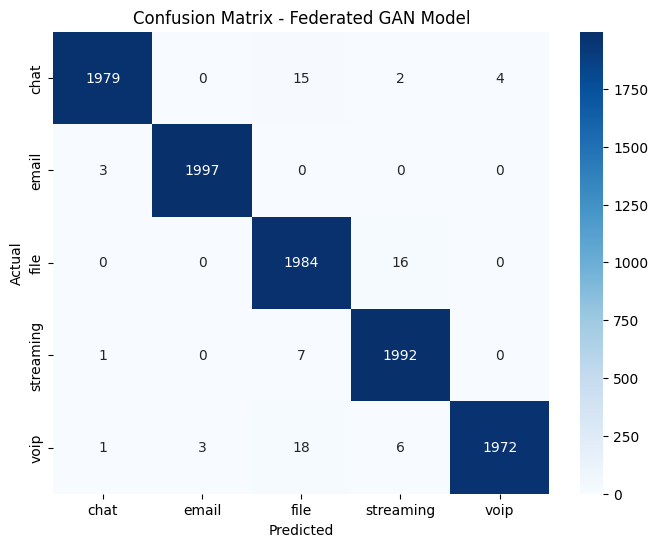

In [ ]:
# 📌 Confusion Matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=LABELS_ISCX, yticklabels=LABELS_ISCX)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Federated GAN Model")
plt.show()

not proper


proper



🔹 Training GAN for Client 1/10...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


743/743 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8155 - loss: 0.6022 - val_accuracy: 0.9756 - val_loss: 0.0845
Epoch 2/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9396 - loss: 0.1502 - val_accuracy: 0.9815 - val_loss: 0.0580
Epoch 3/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9429 - loss: 0.1345 - val_accuracy: 0.9878 - val_loss: 0.0377
Epoch 4/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9455 - loss: 0.1264 - val_accuracy: 0.9864 - val_loss: 0.0389
Epoch 5/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9459 - loss: 0.1208 - val_accuracy: 0.9876 - val_loss: 0.0369
Epoch 6/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9464 - loss: 0.1191 - val_accuracy: 0.9895 - val_loss: 0.0321
Epoch 7/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9480 - loss: 0.1146 - val_accuracy: 0.9906 - val_loss: 0.0291
Epoch 8/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9496 - loss: 0.1099 - val_accuracy: 0.9881 - val_

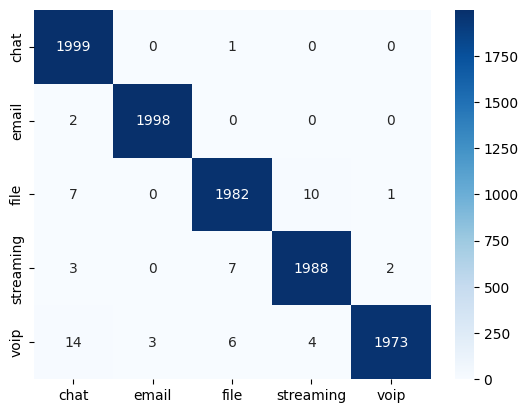

In [ ]:
# -*- coding: utf-8 -*-
"""
Federated Semi-Supervised GAN (FGAN-I) for ISCX 5-Class Dataset
"""

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Labels for ISCX 5-Class dataset
LABELS_ISCX = ['chat', 'email', 'file', 'streaming', 'voip']

# 🔹 Load ISCX dataset
df_ISCX = pd.read_csv('ISCX_5class_each_normalized_cuttedfloefeature.csv')

# 🔹 Extract features & labels
X_ISCX = df_ISCX.iloc[:, 1:].values  # Exclude first column
Y_ISCX = df_ISCX["label"].values     # Target labels

# 🔹 Normalize data
scaler = StandardScaler()
X_ISCX = scaler.fit_transform(X_ISCX)

# 🔹 Split dataset
x_train, x_test, y_train, y_test = train_test_split(X_ISCX, Y_ISCX, test_size=0.1, stratify=Y_ISCX, random_state=5)

# 🔹 Convert labels to categorical (one-hot encoding)
num_classes = len(set(Y_ISCX))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# 🔹 Federated Learning Parameters
NUM_CLIENTS = 10
EPOCHS = 50
BATCH_SIZE = 128
LATENT_DIM = 100  # Size of noise vector for GAN

# ==========================
# 🔹 Define Generator
# ==========================
def build_generator():
    input_g = Input(shape=(LATENT_DIM,))
    x = Dense(256)(input_g)
    x = LeakyReLU(negative_slope=0.2)(x)
    x = Dense(512)(x)
    x = LeakyReLU(negative_slope=0.2)(x)
    x = Dense(X_ISCX.shape[1], activation="tanh")(x)  # Output same size as features
    generator = Model(input_g, x, name="Generator")
    return generator

# ==========================
# 🔹 Define Discriminator
# ==========================
def build_discriminator():
    input_d = Input(shape=(X_ISCX.shape[1],))
    x = Dense(512)(input_d)
    x = LeakyReLU(negative_slope=0.2)(x)
    x = Dense(256)(x)
    x = LeakyReLU(negative_slope=0.2)(x)
    x = Dense(1, activation="sigmoid")(x)  # Binary classification (Real or Fake)
    discriminator = Model(input_d, x, name="Discriminator")
    discriminator.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5), metrics=["accuracy"])
    return discriminator

# ==========================
# 🔹 Federated Learning Setup
# ==========================
client_generators = []
client_discriminators = []

for _ in range(NUM_CLIENTS):
    gen = build_generator()
    disc = build_discriminator()
    client_generators.append(gen)
    client_discriminators.append(disc)

# 🔹 Split training data for each client
client_data = np.array_split(x_train, NUM_CLIENTS)
client_labels = np.array_split(y_train, NUM_CLIENTS)

# ==========================
# 🔹 Train Federated GAN
# ==========================
for client_id in range(NUM_CLIENTS):
    print(f"\n🔹 Training GAN for Client {client_id + 1}/{NUM_CLIENTS}...")

    generator = client_generators[client_id]
    discriminator = client_discriminators[client_id]

    # 📌 Compile Generator and GAN before training
    generator.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5))

    # 📌 Create and compile the full GAN model
    discriminator.trainable = False  # Freeze Discriminator for GAN training
    gan_input = Input(shape=(LATENT_DIM,))
    generated_samples = generator(gan_input)
    gan_output = discriminator(generated_samples)
    gan = Model(gan_input, gan_output)
    gan.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5))

    # 📌 Train Discriminator with Label Smoothing
    half_batch = BATCH_SIZE // 2
    for epoch in range(EPOCHS):
        idx = np.random.randint(0, client_data[client_id].shape[0], half_batch)
        real_samples = client_data[client_id][idx]
        real_labels = np.ones((half_batch, 1)) * 0.9  # Label smoothing

        noise = np.random.normal(0, 1, (half_batch, LATENT_DIM))
        generated_samples = generator.predict(noise)
        fake_labels = np.zeros((half_batch, 1)) + 0.1  # Fake label smoothing

        d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
        d_loss_fake = discriminator.train_on_batch(generated_samples, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # 📌 Train Generator through GAN
        noise = np.random.normal(0, 1, (BATCH_SIZE, LATENT_DIM))
        g_loss = gan.train_on_batch(noise, np.ones((BATCH_SIZE, 1)))

    print(f"📌 Client {client_id + 1}: D Loss = {d_loss[0]:.4f}, G Loss = {g_loss:.4f}")

# ==========================
# 🔹 Federated Aggregation (FedAvg)
# ==========================
def federated_aggregation(models):
    """ Aggregates weights using FedAvg (Federated Averaging) """
    new_weights = []
    for layer_idx in range(len(models[0].get_weights())):
        layer_weights = np.mean([model.get_weights()[layer_idx] for model in models], axis=0)
        new_weights.append(layer_weights)
    return new_weights

# 📌 Aggregate Generator & Discriminator Weights
aggregated_gen_weights = federated_aggregation(client_generators)
aggregated_disc_weights = federated_aggregation(client_discriminators)

# 📌 Apply Aggregated Weights
for gen in client_generators:
    gen.set_weights(aggregated_gen_weights)
for disc in client_discriminators:
    disc.set_weights(aggregated_disc_weights)

# ==========================
# 🔹 Generate Synthetic Data & Train CNN
# ==========================
num_samples = 5000
noise = np.random.normal(0, 1, (num_samples, LATENT_DIM))
synthetic_data = client_generators[0].predict(noise)
synthetic_labels = np.random.randint(0, num_classes, num_samples)
synthetic_labels = tf.keras.utils.to_categorical(synthetic_labels, num_classes)

X_combined = np.vstack((x_train, synthetic_data))
Y_combined = np.vstack((y_train, synthetic_labels))

cnn = tf.keras.models.Sequential([
    Dense(128, activation="relu", input_shape=(X_ISCX.shape[1],)),
    Dense(64, activation="relu"),
    Dense(num_classes, activation="softmax")
])
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
cnn.fit(X_combined, Y_combined, epochs=50, batch_size=128, validation_data=(x_test, y_test))

# 📌 Confusion Matrix
y_pred = cnn.predict(x_test)
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=LABELS_ISCX, yticklabels=LABELS_ISCX)
plt.show()



🔹 Training GAN for Client 1/10...


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


📌 Client 1: D Loss = 1.1317, G Loss = 0.2413

🔹 Training GAN for Client 2/10...
📌 Client 2: D Loss = 1.0681, G Loss = 0.2570

🔹 Training GAN for Client 3/10...
📌 Client 3: D Loss = 1.1220, G Loss = 0.2453

🔹 Training GAN for Client 4/10...
📌 Client 4: D Loss = 1.0883, G Loss = 0.2952

🔹 Training GAN for Client 5/10...
📌 Client 5: D Loss = 1.0213, G Loss = 0.3097

🔹 Training GAN for Client 6/10...
📌 Client 6: D Loss = 1.1666, G Loss = 0.2268

🔹 Training GAN for Client 7/10...
📌 Client 7: D Loss = 1.1021, G Loss = 0.2582

🔹 Training GAN for Client 8/10...
📌 Client 8: D Loss = 1.1663, G Loss = 0.2287

🔹 Training GAN for Client 9/10...
📌 Client 9: D Loss = 1.1340, G Loss = 0.2810

🔹 Training GAN for Client 10/10...
📌 Client 10: D Loss = 1.0637, G Loss = 0.3046
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


743/743 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7905 - loss: 0.6463 - val_accuracy: 0.9753 - val_loss: 0.0873
Epoch 2/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9393 - loss: 0.1514 - val_accuracy: 0.9833 - val_loss: 0.0542
Epoch 3/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9434 - loss: 0.1305 - val_accuracy: 0.9858 - val_loss: 0.0447
Epoch 4/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9462 - loss: 0.1229 - val_accuracy: 0.9875 - val_loss: 0.0367
Epoch 5/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9473 - loss: 0.1166 - val_accuracy: 0.9866 - val_loss: 0.0377
Epoch 6/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9469 - loss: 0.1186 - val_accuracy: 0.9893 - val_loss: 0.0292
Epoch 7/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9493 - loss: 0.1134 - val_accuracy: 0.9891 - val_loss: 0.0306
Epoch 8/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9494 - loss: 0.1107 - val_accuracy: 0.9892 - val_

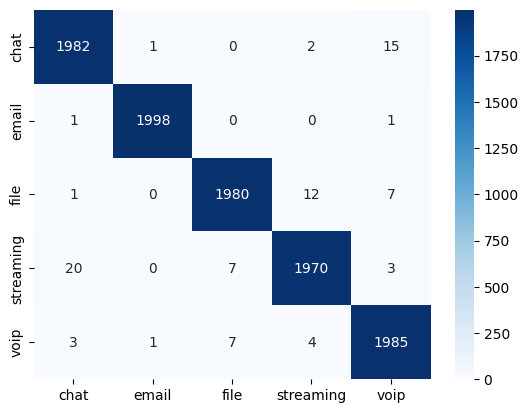

In [ ]:
# -*- coding: utf-8 -*-
"""
Federated Semi-Supervised GAN (FGAN-I) for ISCX 5-Class Dataset
"""

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Labels for ISCX 5-Class dataset
LABELS_ISCX = ['chat', 'email', 'file', 'streaming', 'voip']

# 🔹 Load ISCX dataset
df_ISCX = pd.read_csv('ISCX_5class_each_normalized_cuttedfloefeature.csv')

# 🔹 Extract features & labels
X_ISCX = df_ISCX.iloc[:, 1:].values  # Exclude first column
Y_ISCX = df_ISCX["label"].values     # Target labels

# 🔹 Normalize data
scaler = StandardScaler()
X_ISCX = scaler.fit_transform(X_ISCX)

# 🔹 Split dataset
x_train, x_test, y_train, y_test = train_test_split(X_ISCX, Y_ISCX, test_size=0.1, stratify=Y_ISCX, random_state=5)

# 🔹 Convert labels to categorical (one-hot encoding)
num_classes = len(set(Y_ISCX))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# 🔹 Federated Learning Parameters
NUM_CLIENTS = 10
EPOCHS = 50
BATCH_SIZE = 128
LATENT_DIM = 100  # Size of noise vector for GAN

# ==========================
# 🔹 Define Generator
# ==========================
def build_generator():
    input_g = Input(shape=(LATENT_DIM,))
    x = Dense(256)(input_g)
    x = LeakyReLU(negative_slope=0.2)(x)
    x = Dense(512)(x)
    x = LeakyReLU(negative_slope=0.2)(x)
    x = Dense(X_ISCX.shape[1], activation="tanh")(x)  # Output same size as features
    generator = Model(input_g, x, name="Generator")
    return generator

# ==========================
# 🔹 Define Discriminator
# ==========================
def build_discriminator():
    input_d = Input(shape=(X_ISCX.shape[1],))
    x = Dense(512)(input_d)
    x = LeakyReLU(negative_slope=0.2)(x)
    x = Dense(256)(x)
    x = LeakyReLU(negative_slope=0.2)(x)
    x = Dense(1, activation="sigmoid")(x)  # Binary classification (Real or Fake)
    discriminator = Model(input_d, x, name="Discriminator")
    return discriminator

# ==========================
# 🔹 Federated Learning Setup
# ==========================
client_generators = []
client_discriminators = []

for _ in range(NUM_CLIENTS):
    gen = build_generator()
    disc = build_discriminator()

    # 🔹 Compile Generator & Discriminator before training
    disc.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5), metrics=["accuracy"])
    gen.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5))

    client_generators.append(gen)
    client_discriminators.append(disc)

# 🔹 Split training data for each client
client_data = np.array_split(x_train, NUM_CLIENTS)
client_labels = np.array_split(y_train, NUM_CLIENTS)

# ==========================
# 🔹 Train Federated GAN
# ==========================
def train_gan(client_id):
    print(f"\n🔹 Training GAN for Client {client_id + 1}/{NUM_CLIENTS}...")

    generator = client_generators[client_id]
    discriminator = client_discriminators[client_id]

    # ✅ Re-compile the discriminator to ensure trainable weights
    discriminator.trainable = True
    discriminator.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5), metrics=["accuracy"])

    # ✅ Define & Compile GAN
    discriminator.trainable = False  # Freeze Discriminator during GAN training
    gan_input = Input(shape=(LATENT_DIM,))
    generated_samples = generator(gan_input)
    gan_output = discriminator(generated_samples)
    gan = Model(gan_input, gan_output)
    gan.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5))

    half_batch = BATCH_SIZE // 2
    for epoch in range(EPOCHS):
        idx = np.random.randint(0, client_data[client_id].shape[0], half_batch)
        real_samples = client_data[client_id][idx]
        real_labels = np.ones((half_batch, 1)) * 0.9  # Label smoothing

        noise = np.random.normal(0, 1, (half_batch, LATENT_DIM))
        generated_samples = generator(noise, training=True)  # ✅ FIXED `.predict()`

        fake_labels = np.zeros((half_batch, 1)) + 0.1  # Fake label smoothing

        d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
        d_loss_fake = discriminator.train_on_batch(generated_samples, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        noise = np.random.normal(0, 1, (BATCH_SIZE, LATENT_DIM))
        g_loss = gan.train_on_batch(noise, np.ones((BATCH_SIZE, 1)))

    print(f"📌 Client {client_id + 1}: D Loss = {d_loss[0]:.4f}, G Loss = {g_loss:.4f}")

# 🔹 Train all clients
for client_id in range(NUM_CLIENTS):
    train_gan(client_id)

# ==========================
# 🔹 Federated Aggregation (FedAvg)
# ==========================
def federated_aggregation(models):
    """ Aggregates weights using FedAvg (Federated Averaging) """
    new_weights = []
    for layer_idx in range(len(models[0].get_weights())):
        layer_weights = np.mean([model.get_weights()[layer_idx] for model in models], axis=0)
        new_weights.append(layer_weights)
    return new_weights

# 🔹 Aggregate Generator & Discriminator Weights
aggregated_gen_weights = federated_aggregation(client_generators)
aggregated_disc_weights = federated_aggregation(client_discriminators)

# 🔹 Apply Aggregated Weights
for gen in client_generators:
    gen.set_weights(aggregated_gen_weights)
for disc in client_discriminators:
    disc.set_weights(aggregated_disc_weights)

# ==========================
# 🔹 Generate Synthetic Data & Train CNN
# ==========================
num_samples = 5000
noise = np.random.normal(0, 1, (num_samples, LATENT_DIM))
synthetic_data = client_generators[0](noise, training=False)  # ✅ FIXED `.predict()`
synthetic_labels = np.random.randint(0, num_classes, num_samples)
synthetic_labels = tf.keras.utils.to_categorical(synthetic_labels, num_classes)

X_combined = np.vstack((x_train, synthetic_data))
Y_combined = np.vstack((y_train, synthetic_labels))

cnn = tf.keras.models.Sequential([
    Dense(128, activation="relu", input_shape=(X_ISCX.shape[1],)),
    Dense(64, activation="relu"),
    Dense(num_classes, activation="softmax")
])
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
cnn.fit(X_combined, Y_combined, epochs=50, batch_size=128, validation_data=(x_test, y_test))

# 🔹 Confusion Matrix
y_pred = cnn.predict(x_test)
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=LABELS_ISCX, yticklabels=LABELS_ISCX)
plt.show()


In [ ]:
# -*- coding: utf-8 -*-
"""
Federated Semi-Supervised GAN (SGAN) for ISCX 5-Class Dataset
"""

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Labels for ISCX 5-Class dataset
LABELS_ISCX = ['chat', 'email', 'file', 'streaming', 'voip']

# 🔹 Load ISCX dataset
df_ISCX = pd.read_csv('ISCX_5class_each_normalized_cuttedfloefeature.csv')

# 🔹 Extract features & labels
X_ISCX = df_ISCX.iloc[:, 1:].values  # Exclude first column
Y_ISCX = df_ISCX["label"].values     # Target labels

# 🔹 Normalize data
scaler = StandardScaler()
X_ISCX = scaler.fit_transform(X_ISCX)

# 🔹 Split dataset
x_train, x_test, y_train, y_test = train_test_split(X_ISCX, Y_ISCX, test_size=0.1, stratify=Y_ISCX, random_state=5)

# 🔹 Convert labels to categorical (one-hot encoding)
num_classes = len(set(Y_ISCX))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# 🔹 Federated Learning Parameters
NUM_CLIENTS = 10
EPOCHS = 50
BATCH_SIZE = 128
LATENT_DIM = 100  # Size of noise vector for GAN

# ==========================
# 🔹 Define Generator
# ==========================
def build_generator():
    input_g = Input(shape=(LATENT_DIM,))
    x = Dense(256)(input_g)
    x = LeakyReLU(negative_slope=0.2)(x)
    x = Dense(512)(x)
    x = LeakyReLU(negative_slope=0.2)(x)
    x = Dense(X_ISCX.shape[1], activation="tanh")(x)  # Output same size as features
    generator = Model(input_g, x, name="SGAN_Generator")
    return generator

# ==========================
# 🔹 Define Discriminator
# ==========================
def build_discriminator():
    input_d = Input(shape=(X_ISCX.shape[1],))
    x = Dense(512)(input_d)
    x = LeakyReLU(negative_slope=0.2)(x)
    x = Dense(256)(x)
    x = LeakyReLU(negative_slope=0.2)(x)
    x = Dense(1, activation="sigmoid")(x)  # ✅ Ensure output is (batch_size, 1)

    discriminator = Model(input_d, x, name="SGAN_Discriminator")
    return discriminator

# ==========================
# 🔹 Federated Learning Setup
# ==========================
client_generators = []
client_discriminators = []

for _ in range(NUM_CLIENTS):
    gen = build_generator()
    disc = build_discriminator()

    # 🔹 Compile Generator & Discriminator before training
    disc.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5), metrics=["accuracy"])
    gen.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5))

    client_generators.append(gen)
    client_discriminators.append(disc)

# 🔹 Split training data for each client
client_data = np.array_split(x_train, NUM_CLIENTS)
client_labels = np.array_split(y_train, NUM_CLIENTS)

# ==========================
# 🔹 Train Federated SGAN
# ==========================
def train_sgan(client_id):
    print(f"\n🔹 Training SGAN for Client {client_id + 1}/{NUM_CLIENTS}...")

    generator = client_generators[client_id]
    discriminator = client_discriminators[client_id]

    # ✅ Re-compile the discriminator to ensure trainable weights
    discriminator.trainable = True
    discriminator.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5), metrics=["accuracy"])

    # ✅ Define & Compile GAN
    discriminator.trainable = False  # Freeze Discriminator during GAN training
    gan_input = Input(shape=(LATENT_DIM,))
    generated_samples = generator(gan_input)
    gan_output = discriminator(generated_samples)
    gan = Model(gan_input, gan_output)
    gan.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5))

    half_batch = BATCH_SIZE // 2
    for epoch in range(EPOCHS):
        idx = np.random.randint(0, client_data[client_id].shape[0], half_batch)
        real_samples = client_data[client_id][idx]
        real_labels = np.ones((half_batch, 1)) * 0.9  # Smoothed real labels

        noise = np.random.normal(0, 1, (half_batch, LATENT_DIM))
        generated_samples = generator(noise, training=True)

        fake_labels = np.zeros((half_batch, 1)) + 0.1  # Fake label smoothing

        d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
        d_loss_fake = discriminator.train_on_batch(generated_samples, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        noise = np.random.normal(0, 1, (BATCH_SIZE, LATENT_DIM))
        g_loss = gan.train_on_batch(noise, np.ones((BATCH_SIZE, 1)))

    print(f"📌 Client {client_id + 1}: D Loss = {d_loss[0]:.4f}, G Loss = {g_loss:.4f}")

# 🔹 Train all clients
for client_id in range(NUM_CLIENTS):
    train_sgan(client_id)

# ==========================
# 🔹 Federated Aggregation (FedAvg)
# ==========================
def federated_aggregation(models):
    """ Aggregates weights using FedAvg (Federated Averaging) """
    new_weights = []
    for layer_idx in range(len(models[0].get_weights())):
        layer_weights = np.mean([model.get_weights()[layer_idx] for model in models], axis=0)
        new_weights.append(layer_weights)
    return new_weights

# 🔹 Aggregate Generator & Discriminator Weights
aggregated_gen_weights = federated_aggregation(client_generators)
aggregated_disc_weights = federated_aggregation(client_discriminators)

# 🔹 Apply Aggregated Weights
for gen in client_generators:
    gen.set_weights(aggregated_gen_weights)
for disc in client_discriminators:
    disc.set_weights(aggregated_disc_weights)

# ==========================
# 🔹 Generate Synthetic Data & Train SGAN Classifier
# ==========================
num_samples = 5000
noise = np.random.normal(0, 1, (num_samples, LATENT_DIM))
synthetic_data = client_generators[0](noise, training=False)
synthetic_labels = np.random.randint(0, num_classes, num_samples)
synthetic_labels = tf.keras.utils.to_categorical(synthetic_labels, num_classes)

X_combined = np.vstack((x_train, synthetic_data))
Y_combined = np.vstack((y_train, synthetic_labels))

# ✅ SGAN Classifier
sgan_classifier = tf.keras.models.Sequential([
    Dense(128, activation="relu", input_shape=(X_ISCX.shape[1],)),
    Dense(64, activation="relu"),
    Dense(num_classes, activation="softmax")
])
sgan_classifier.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
sgan_classifier.fit(X_combined, Y_combined, epochs=50, batch_size=128, validation_data=(x_test, y_test))



🔹 Training SGAN for Client 1/10...


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


📌 Client 1: D Loss = 1.0673, G Loss = 0.2869

🔹 Training SGAN for Client 2/10...
📌 Client 2: D Loss = 1.1784, G Loss = 0.2182

🔹 Training SGAN for Client 3/10...
📌 Client 3: D Loss = 1.0668, G Loss = 0.2991

🔹 Training SGAN for Client 4/10...
📌 Client 4: D Loss = 1.1262, G Loss = 0.2523

🔹 Training SGAN for Client 5/10...
📌 Client 5: D Loss = 1.1375, G Loss = 0.2470

🔹 Training SGAN for Client 6/10...
📌 Client 6: D Loss = 1.1467, G Loss = 0.2198

🔹 Training SGAN for Client 7/10...
📌 Client 7: D Loss = 1.0865, G Loss = 0.2715

🔹 Training SGAN for Client 8/10...
📌 Client 8: D Loss = 1.0845, G Loss = 0.2631

🔹 Training SGAN for Client 9/10...
📌 Client 9: D Loss = 1.1414, G Loss = 0.2533

🔹 Training SGAN for Client 10/10...
📌 Client 10: D Loss = 1.1436, G Loss = 0.2399
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


743/743 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7925 - loss: 0.6259 - val_accuracy: 0.9736 - val_loss: 0.0826
Epoch 2/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9392 - loss: 0.1506 - val_accuracy: 0.9817 - val_loss: 0.0480
Epoch 3/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9433 - loss: 0.1301 - val_accuracy: 0.9862 - val_loss: 0.0457
Epoch 4/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9459 - loss: 0.1229 - val_accuracy: 0.9870 - val_loss: 0.0414
Epoch 5/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9459 - loss: 0.1220 - val_accuracy: 0.9876 - val_loss: 0.0313
Epoch 6/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9478 - loss: 0.1154 - val_accuracy: 0.9890 - val_loss: 0.0288
Epoch 7/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9479 - loss: 0.1136 - val_accuracy: 0.9873 - val_loss: 0.0338
Epoch 8/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9495 - loss: 0.1129 - val_accuracy: 0.9888 - val_

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

🔹 Classification Report:

              precision    recall  f1-score   support

        chat       0.99      1.00      0.99      2000
       email       1.00      1.00      1.00      2000
        file       1.00      0.99      0.99      2000
   streaming       0.99      0.99      0.99      2000
        voip       1.00      0.99      0.99      2000

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



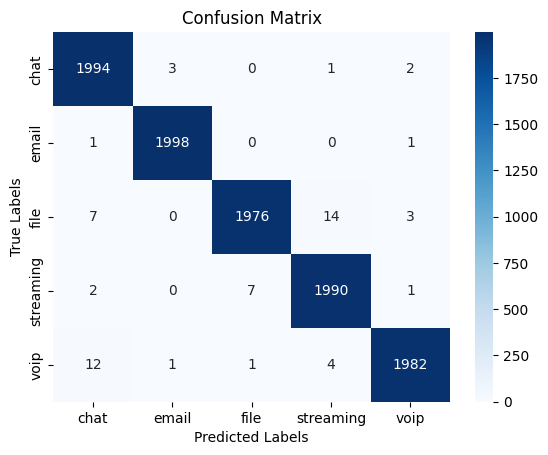

In [ ]:
# 🔹 Evaluate SGAN Classifier
y_pred = sgan_classifier.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# 🔹 Print Classification Report
print("\n🔹 Classification Report:\n")
print(classification_report(y_true_classes, y_pred_classes, target_names=LABELS_ISCX))

# 🔹 Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=LABELS_ISCX, yticklabels=LABELS_ISCX)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


fgan1

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8464 - loss: 0.5926 - val_accuracy: 0.5959 - val_loss: 1.2145
Epoch 2/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9787 - loss: 0.0716 - val_accuracy: 0.5964 - val_loss: 1.6374
Epoch 3/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9848 - loss: 0.0475 - val_accuracy: 0.5971 - val_loss: 1.8781
Epoch 4/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9878 - loss: 0.0396 - val_accuracy: 0.5974 - val_loss: 2.0240
Epoch 5/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9881 - loss: 0.0369 - val_accuracy: 0.5972 - val_loss: 2.2400
Epoch 6/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9889 - loss: 0.0332 - val_accuracy: 0.5972 - val_loss: 2.4372
Epoch 7/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9881 - loss: 0.0350 - val_accuracy: 0.5970 - val_loss: 2.7199
Epoch 8/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9894 - loss: 0.0285 - val_accuracy: 0.

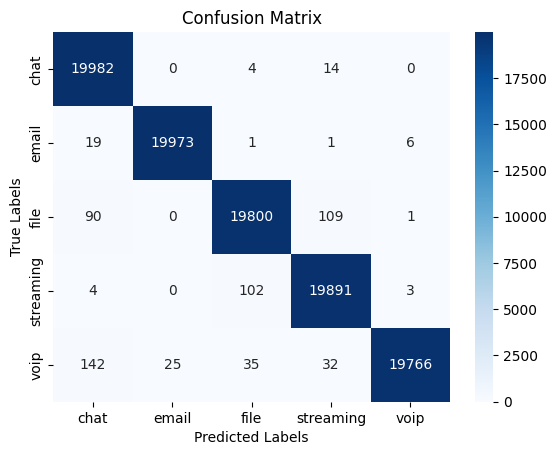

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LeakyReLU, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ==========================
# 🔹 Load and Preprocess Dataset
# ==========================
LABELS_ISCX = ['chat', 'email', 'file', 'streaming', 'voip']
df_ISCX = pd.read_csv('ISCX_5class_each_normalized_cuttedfloefeature.csv')
X_ISCX = df_ISCX.iloc[:, 1:].values  # Exclude first column
Y_ISCX = df_ISCX["label"].values     # Target labels

# Normalize dataset
scaler = StandardScaler()
X_ISCX = scaler.fit_transform(X_ISCX)

# Convert labels to categorical
num_classes = len(set(Y_ISCX))
y_ISCX = tf.keras.utils.to_categorical(Y_ISCX, num_classes)

# ==========================
# 🔹 Define FGAN-I Components
# ==========================
LATENT_DIM = 100
NUM_CLIENTS = 10
BATCH_SIZE = 128
EPOCHS = 50

# Generator
def build_generator():
    input_g = Input(shape=(LATENT_DIM,))
    x = Dense(256)(input_g)
    x = LeakyReLU(0.2)(x)
    x = Dense(512)(x)
    x = LeakyReLU(0.2)(x)
    x = Dense(X_ISCX.shape[1], activation="tanh")(x)
    return Model(input_g, x, name="FGAN1_Generator")

# Discriminator
def build_discriminator():
    input_d = Input(shape=(X_ISCX.shape[1],))
    x = Dense(512)(input_d)
    x = LeakyReLU(0.2)(x)
    x = Dense(256)(x)
    x = LeakyReLU(0.2)(x)
    x = Dense(1, activation="sigmoid")(x)
    return Model(input_d, x, name="FGAN1_Discriminator")

# ==========================
# 🔹 Federated Learning Setup
# ==========================
client_generators = [build_generator() for _ in range(NUM_CLIENTS)]
client_discriminators = [build_discriminator() for _ in range(NUM_CLIENTS)]

for disc in client_discriminators:
    disc.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5), metrics=["accuracy"])

client_data = np.array_split(X_ISCX, NUM_CLIENTS)
client_labels = np.array_split(y_ISCX, NUM_CLIENTS)

# ==========================
# 🔹 Train Federated FGAN-I
# ==========================
def train_fgan1(client_id):
    generator = client_generators[client_id]
    discriminator = client_discriminators[client_id]

    discriminator.trainable = True
    discriminator.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5), metrics=["accuracy"])

    gan_input = Input(shape=(LATENT_DIM,))
    generated_samples = generator(gan_input)
    gan_output = discriminator(generated_samples)
    gan = Model(gan_input, gan_output)
    gan.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5))

    half_batch = BATCH_SIZE // 2
    for epoch in range(EPOCHS):
        idx = np.random.randint(0, client_data[client_id].shape[0], half_batch)
        real_samples = client_data[client_id][idx]
        real_labels = np.ones((half_batch, 1)) * 0.9
        noise = np.random.normal(0, 1, (half_batch, LATENT_DIM))
        generated_samples = generator(noise, training=True)
        fake_labels = np.zeros((half_batch, 1)) + 0.1

        d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
        d_loss_fake = discriminator.train_on_batch(generated_samples, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        noise = np.random.normal(0, 1, (BATCH_SIZE, LATENT_DIM))
        g_loss = gan.train_on_batch(noise, np.ones((BATCH_SIZE, 1)))

# Train all clients
for client_id in range(NUM_CLIENTS):
    train_fgan1(client_id)

# ==========================
# 🔹 Federated Model Aggregation (FedAvg)
# ==========================
def federated_aggregation(models):
    new_weights = []
    for layer_idx in range(len(models[0].get_weights())):
        layer_weights = np.mean([model.get_weights()[layer_idx] for model in models], axis=0)
        new_weights.append(layer_weights)
    return new_weights

aggregated_gen_weights = federated_aggregation(client_generators)
aggregated_disc_weights = federated_aggregation(client_discriminators)

for gen in client_generators:
    gen.set_weights(aggregated_gen_weights)
for disc in client_discriminators:
    disc.set_weights(aggregated_disc_weights)

# ==========================
# 🔹 Train Traffic Classifier
# ==========================
def assign_pseudo_labels(generator, num_samples=5000):
    noise = np.random.normal(0, 1, (num_samples, LATENT_DIM))
    synthetic_data = generator(noise, training=False)
    kmeans = KMeans(n_clusters=num_classes, random_state=42)
    pseudo_labels = kmeans.fit_predict(synthetic_data)
    return synthetic_data, tf.keras.utils.to_categorical(pseudo_labels, num_classes)

synthetic_data, synthetic_labels = assign_pseudo_labels(client_generators[0])
X_combined = np.vstack((X_ISCX, synthetic_data))
Y_combined = np.vstack((y_ISCX, synthetic_labels))

classifier = tf.keras.models.Sequential([
    Dense(128, activation="relu", input_shape=(X_ISCX.shape[1],)),
    Dense(64, activation="relu"),
    Dense(num_classes, activation="softmax")
])
classifier.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
classifier.fit(X_combined, Y_combined, epochs=50, batch_size=128, validation_split=0.1)

# Evaluate Classifier
y_pred = classifier.predict(X_ISCX)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_ISCX, axis=1)
print(classification_report(y_true_classes, y_pred_classes, target_names=LABELS_ISCX))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=LABELS_ISCX, yticklabels=LABELS_ISCX)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


updated fgan

Epoch 1/50 - Training Client 1/10
Client 1: D Loss = 0.6897, G Loss = 0.6367
Epoch 2/50 - Training Client 1/10
Client 1: D Loss = 0.6963, G Loss = 0.6148
Epoch 3/50 - Training Client 1/10
Client 1: D Loss = 0.6991, G Loss = 0.5907
Epoch 4/50 - Training Client 1/10
Client 1: D Loss = 0.7054, G Loss = 0.5705
Epoch 5/50 - Training Client 1/10
Client 1: D Loss = 0.7080, G Loss = 0.5571
Epoch 6/50 - Training Client 1/10
Client 1: D Loss = 0.7107, G Loss = 0.5438
Epoch 7/50 - Training Client 1/10
Client 1: D Loss = 0.7170, G Loss = 0.5343
Epoch 8/50 - Training Client 1/10
Client 1: D Loss = 0.7221, G Loss = 0.5266
Epoch 9/50 - Training Client 1/10
Client 1: D Loss = 0.7265, G Loss = 0.5197
Epoch 10/50 - Training Client 1/10
Client 1: D Loss = 0.7286, G Loss = 0.5138
Epoch 11/50 - Training Client 1/10
Client 1: D Loss = 0.7311, G Loss = 0.5089
Epoch 12/50 - Training Client 1/10
Client 1: D Loss = 0.7326, G Loss = 0.5047
Epoch 13/50 - Training Client 1/10
Client 1: D Loss = 0.7343, G Loss = 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


739/739 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8224 - loss: 0.5962 - val_accuracy: 0.6272 - val_loss: 0.9063
Epoch 2/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9810 - loss: 0.0695 - val_accuracy: 0.6371 - val_loss: 1.0561
Epoch 3/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9853 - loss: 0.0491 - val_accuracy: 0.6426 - val_loss: 1.2099
Epoch 4/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9868 - loss: 0.0433 - val_accuracy: 0.6323 - val_loss: 1.2892
Epoch 5/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9880 - loss: 0.0368 - val_accuracy: 0.6419 - val_loss: 1.4326
Epoch 6/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9888 - loss: 0.0352 - val_accuracy: 0.6448 - val_loss: 1.5039
Epoch 7/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9885 - loss: 0.0345 - val_accuracy: 0.6332 - val_loss: 1.7082
Epoch 8/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9894 - loss: 0.0299 - val_accuracy: 0.6380 - val_

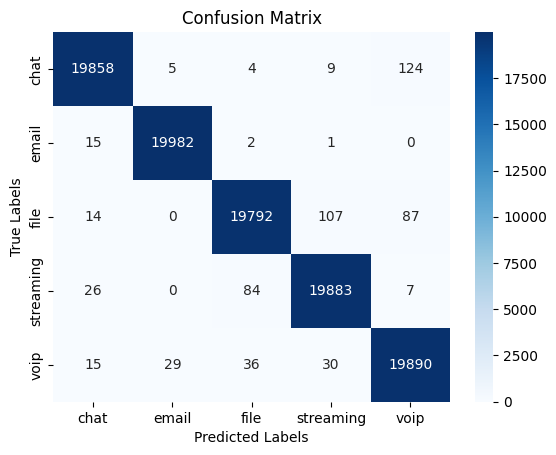

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LeakyReLU, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# ==========================
# 🔹 Load and Preprocess Dataset
# ==========================
LABELS_ISCX = ['chat', 'email', 'file', 'streaming', 'voip']
df_ISCX = pd.read_csv('ISCX_5class_each_normalized_cuttedfloefeature.csv')
X_ISCX = df_ISCX.iloc[:, 1:].values  # Exclude first column
Y_ISCX = df_ISCX["label"].values     # Target labels

# Normalize dataset
scaler = StandardScaler()
X_ISCX = scaler.fit_transform(X_ISCX)

# Convert labels to categorical
num_classes = len(set(Y_ISCX))
y_ISCX = tf.keras.utils.to_categorical(Y_ISCX, num_classes)

# ==========================
# 🔹 Define FGAN-I Components
# ==========================
LATENT_DIM = 100
NUM_CLIENTS = 10
BATCH_SIZE = 128
EPOCHS = 50

# Generator
def build_generator():
    input_g = Input(shape=(LATENT_DIM,))
    x = Dense(256)(input_g)
    x = LeakyReLU(0.2)(x)
    x = Dense(512)(x)
    x = LeakyReLU(0.2)(x)
    x = Dense(X_ISCX.shape[1], activation="tanh")(x)
    return Model(input_g, x, name="FGAN1_Generator")

# Discriminator
def build_discriminator():
    input_d = Input(shape=(X_ISCX.shape[1],))
    x = Dense(512)(input_d)
    x = LeakyReLU(0.2)(x)
    x = Dense(256)(x)
    x = LeakyReLU(0.2)(x)
    x = Dense(1, activation="sigmoid")(x)
    return Model(input_d, x, name="FGAN1_Discriminator")

# ==========================
# 🔹 Federated Learning Setup
# ==========================
client_generators = [build_generator() for _ in range(NUM_CLIENTS)]
client_discriminators = [build_discriminator() for _ in range(NUM_CLIENTS)]

for disc in client_discriminators:
    disc.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5), metrics=["accuracy"])

client_data = np.array_split(X_ISCX, NUM_CLIENTS)
client_labels = np.array_split(y_ISCX, NUM_CLIENTS)

# ==========================
# 🔹 Train Federated FGAN-I
# ==========================
def train_fgan1(client_id):
    generator = client_generators[client_id]
    discriminator = client_discriminators[client_id]

    discriminator.trainable = True
    discriminator.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5), metrics=["accuracy"])

    gan_input = Input(shape=(LATENT_DIM,))
    generated_samples = generator(gan_input)
    gan_output = discriminator(generated_samples)
    gan = Model(gan_input, gan_output)
    gan.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5))

    half_batch = BATCH_SIZE // 2
    for epoch in range(EPOCHS):
        print(f"Epoch {epoch+1}/{EPOCHS} - Training Client {client_id+1}/{NUM_CLIENTS}")
        idx = np.random.randint(0, client_data[client_id].shape[0], half_batch)
        real_samples = client_data[client_id][idx]
        real_labels = np.ones((half_batch, 1)) * 0.9
        noise = np.random.normal(0, 1, (half_batch, LATENT_DIM))
        generated_samples = generator(noise, training=True)
        fake_labels = np.zeros((half_batch, 1)) + 0.1

        d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
        d_loss_fake = discriminator.train_on_batch(generated_samples, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        noise = np.random.normal(0, 1, (BATCH_SIZE, LATENT_DIM))
        g_loss = gan.train_on_batch(noise, np.ones((BATCH_SIZE, 1)))

        print(f"Client {client_id+1}: D Loss = {d_loss[0]:.4f}, G Loss = {g_loss:.4f}")

# Train all clients
for client_id in range(NUM_CLIENTS):
    train_fgan1(client_id)

# ==========================
# 🔹 Federated Model Aggregation (FedAvg)
# ==========================
def federated_aggregation(models):
    new_weights = []
    for layer_idx in range(len(models[0].get_weights())):
        layer_weights = np.mean([model.get_weights()[layer_idx] for model in models], axis=0)
        new_weights.append(layer_weights)
    return new_weights

aggregated_gen_weights = federated_aggregation(client_generators)
aggregated_disc_weights = federated_aggregation(client_discriminators)

for gen in client_generators:
    gen.set_weights(aggregated_gen_weights)
for disc in client_discriminators:
    disc.set_weights(aggregated_disc_weights)


# ==========================
# 🔹 Train Traffic Classifier
# ==========================
def assign_pseudo_labels(generator, num_samples=5000):
    noise = np.random.normal(0, 1, (num_samples, LATENT_DIM))
    synthetic_data = generator(noise, training=False)
    kmeans = KMeans(n_clusters=num_classes, random_state=42)
    pseudo_labels = kmeans.fit_predict(synthetic_data)
    return synthetic_data, tf.keras.utils.to_categorical(pseudo_labels, num_classes)

synthetic_data, synthetic_labels = assign_pseudo_labels(client_generators[0])
X_combined = np.vstack((X_ISCX, synthetic_data))
Y_combined = np.vstack((y_ISCX, synthetic_labels))

classifier = tf.keras.models.Sequential([
    Dense(128, activation="relu", input_shape=(X_ISCX.shape[1],)),
    Dense(64, activation="relu"),
    Dense(num_classes, activation="softmax")
])
classifier.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
classifier.fit(X_combined, Y_combined, epochs=50, batch_size=128, validation_split=0.1)

# Evaluate Classifier
y_pred = classifier.predict(X_ISCX)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_ISCX, axis=1)
print(classification_report(y_true_classes, y_pred_classes, target_names=LABELS_ISCX))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=LABELS_ISCX, yticklabels=LABELS_ISCX)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Epoch 1/50 - Training Client 1/10
Client 1: D Loss = 0.6868, G Loss = 0.7172
Epoch 2/50 - Training Client 1/10
Client 1: D Loss = 0.6746, G Loss = 0.6937
Epoch 3/50 - Training Client 1/10
Client 1: D Loss = 0.6735, G Loss = 0.6700
Epoch 4/50 - Training Client 1/10
Client 1: D Loss = 0.6771, G Loss = 0.6516
Epoch 5/50 - Training Client 1/10
Client 1: D Loss = 0.6786, G Loss = 0.6336
Epoch 6/50 - Training Client 1/10
Client 1: D Loss = 0.6811, G Loss = 0.6200
Epoch 7/50 - Training Client 1/10
Client 1: D Loss = 0.6844, G Loss = 0.6075
Epoch 8/50 - Training Client 1/10
Client 1: D Loss = 0.6855, G Loss = 0.5965
Epoch 9/50 - Training Client 1/10
Client 1: D Loss = 0.6874, G Loss = 0.5874
Epoch 10/50 - Training Client 1/10
Client 1: D Loss = 0.6894, G Loss = 0.5790
Epoch 11/50 - Training Client 1/10
Client 1: D Loss = 0.6909, G Loss = 0.5710
Epoch 12/50 - Training Client 1/10
Client 1: D Loss = 0.6922, G Loss = 0.5638
Epoch 13/50 - Training Client 1/10
Client 1: D Loss = 0.6939, G Loss = 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8512 - loss: 0.5230 - val_accuracy: 0.6259 - val_loss: 0.9726
Epoch 2/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9807 - loss: 0.0663 - val_accuracy: 0.6317 - val_loss: 1.2830
Epoch 3/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9852 - loss: 0.0474 - val_accuracy: 0.6296 - val_loss: 1.4745
Epoch 4/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9879 - loss: 0.0382 - val_accuracy: 0.6248 - val_loss: 1.5999
Epoch 5/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9878 - loss: 0.0369 - val_accuracy: 0.6330 - val_loss: 1.8479
Epoch 6/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9888 - loss: 0.0319 - val_accuracy: 0.6345 - val_loss: 2.0039
Epoch 7/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9892 - loss: 0.0318 - val_accuracy: 0.6346 - val_loss: 2.0786
Epoch 8/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9890 - loss: 0.0307 - val_accuracy: 0.

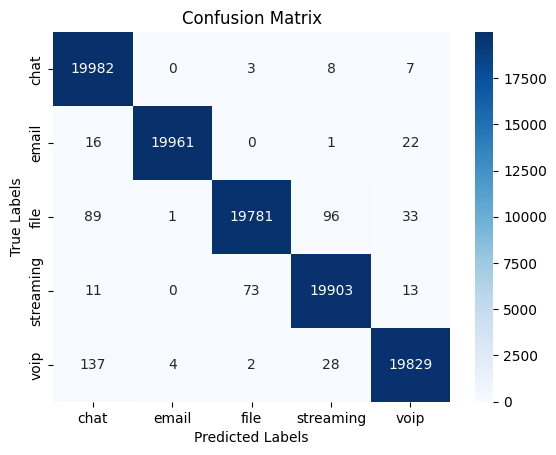

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LeakyReLU, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# ==========================
# 🔹 Load and Preprocess Dataset
# ==========================
LABELS_ISCX = ['chat', 'email', 'file', 'streaming', 'voip']
df_ISCX = pd.read_csv('ISCX_5class_each_normalized_cuttedfloefeature.csv')
X_ISCX = df_ISCX.iloc[:, 1:].values  # Exclude first column (assumed to be an index)
Y_ISCX = df_ISCX["label"].values     # Extract target labels

# Normalize dataset
scaler = StandardScaler()
X_ISCX = scaler.fit_transform(X_ISCX)

# Convert labels to categorical (one-hot encoding)
num_classes = len(set(Y_ISCX))
y_ISCX = tf.keras.utils.to_categorical(Y_ISCX, num_classes)

# ==========================
# 🔹 Define FGAN-II Components
# ==========================
LATENT_DIM = 100  # Size of noise vector
NUM_CLIENTS = 10  # Number of clients in federated learning
BATCH_SIZE = 128
EPOCHS = 50

# === Generator Model (Each Client has One) ===
def build_generator():
    input_g = Input(shape=(LATENT_DIM,))
    x = Dense(256)(input_g)
    x = LeakyReLU(0.2)(x)
    x = Dense(512)(x)
    x = LeakyReLU(0.2)(x)
    x = Dense(X_ISCX.shape[1], activation="tanh")(x)  # Output shape matches dataset features
    return Model(input_g, x, name="FGAN2_Generator")

# === Discriminator Model (Each Client has One) ===
def build_discriminator():
    input_d = Input(shape=(X_ISCX.shape[1],))
    x = Dense(512)(input_d)
    x = LeakyReLU(0.2)(x)
    x = Dense(256)(x)
    x = LeakyReLU(0.2)(x)
    x = Dense(1, activation="sigmoid")(x)  # Binary classification: Real (1) or Fake (0)
    return Model(input_d, x, name="FGAN2_Discriminator")

# ==========================
# 🔹 Federated Learning Setup
# ==========================
# Each client has its own generator and discriminator
client_models = [{"G": build_generator(), "D": build_discriminator()} for _ in range(NUM_CLIENTS)]

# Compile all discriminators
for client in client_models:
    client["D"].compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5), metrics=["accuracy"])

# Split dataset among clients
client_data = np.array_split(X_ISCX, NUM_CLIENTS)
client_labels = np.array_split(y_ISCX, NUM_CLIENTS)

# ==========================
# 🔹 Train Federated FGAN-II
# ==========================
def train_fgan2(client_id):
    """ Train local GAN model at each client """
    generator = client_models[client_id]["G"]
    discriminator = client_models[client_id]["D"]

    # Freeze discriminator while training generator
    discriminator.trainable = True
    gan_input = Input(shape=(LATENT_DIM,))
    generated_samples = generator(gan_input)
    gan_output = discriminator(generated_samples)
    gan = Model(gan_input, gan_output)
    gan.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5))

    half_batch = BATCH_SIZE // 2
    for epoch in range(EPOCHS):
        print(f"Epoch {epoch+1}/{EPOCHS} - Training Client {client_id+1}/{NUM_CLIENTS}")

        # Train Discriminator
        idx = np.random.randint(0, client_data[client_id].shape[0], half_batch)
        real_samples = client_data[client_id][idx]
        real_labels = np.ones((half_batch, 1)) * 0.9  # Label smoothing

        noise = np.random.normal(0, 1, (half_batch, LATENT_DIM))
        generated_samples = generator(noise, training=True)
        fake_labels = np.zeros((half_batch, 1)) + 0.1  # Fake label smoothing

        d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
        d_loss_fake = discriminator.train_on_batch(generated_samples, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        noise = np.random.normal(0, 1, (BATCH_SIZE, LATENT_DIM))
        g_loss = gan.train_on_batch(noise, np.ones((BATCH_SIZE, 1)))

        print(f"Client {client_id+1}: D Loss = {d_loss[0]:.4f}, G Loss = {g_loss:.4f}")

# Train all clients in federated learning
for client_id in range(NUM_CLIENTS):
    train_fgan2(client_id)

# ==========================
# 🔹 Federated Model Aggregation (FedAvg)
# ==========================
def federated_aggregation(models):
    """ Perform FedAvg: Aggregate model parameters from all clients """
    new_weights = []
    for layer_idx in range(len(models[0].get_weights())):
        layer_weights = np.mean([model.get_weights()[layer_idx] for model in models], axis=0)
        new_weights.append(layer_weights)
    return new_weights

# Aggregate Generator & Discriminator Weights
aggregated_gen_weights = federated_aggregation([client["G"] for client in client_models])
aggregated_disc_weights = federated_aggregation([client["D"] for client in client_models])

# Apply aggregated weights to all clients
for client in client_models:
    client["G"].set_weights(aggregated_gen_weights)
    client["D"].set_weights(aggregated_disc_weights)

# ==========================
# 🔹 Train Traffic Classifier
# ==========================
def assign_pseudo_labels(generator, num_samples=5000):
    """ Generate synthetic data and assign pseudo-labels using K-Means clustering """
    noise = np.random.normal(0, 1, (num_samples, LATENT_DIM))
    synthetic_data = generator(noise, training=False)
    kmeans = KMeans(n_clusters=num_classes, random_state=42)
    pseudo_labels = kmeans.fit_predict(synthetic_data)
    return synthetic_data, tf.keras.utils.to_categorical(pseudo_labels, num_classes)

synthetic_data, synthetic_labels = assign_pseudo_labels(client_models[0]["G"])
X_combined = np.vstack((X_ISCX, synthetic_data))
Y_combined = np.vstack((y_ISCX, synthetic_labels))

classifier = tf.keras.models.Sequential([
    Dense(128, activation="relu", input_shape=(X_ISCX.shape[1],)),
    Dense(64, activation="relu"),
    Dense(num_classes, activation="softmax")
])
classifier.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
classifier.fit(X_combined, Y_combined, epochs=50, batch_size=128, validation_split=0.1)

# Evaluate Classifier
y_pred = classifier.predict(X_ISCX)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_ISCX, axis=1)
print(classification_report(y_true_classes, y_pred_classes, target_names=LABELS_ISCX))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=LABELS_ISCX, yticklabels=LABELS_ISCX)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


no

-----------------------------------------------
===============================================
-----------------------------------------------

no
fgan2 updated

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LeakyReLU, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# ==========================
# 🔹 Load and Preprocess Dataset
# ==========================
LABELS_ISCX = ['chat', 'email', 'file', 'streaming', 'voip']
df_ISCX = pd.read_csv('ISCX_5class_each_normalized_cuttedfloefeature.csv')
X_ISCX = df_ISCX.iloc[:, 1:].values  # Exclude first column (assumed to be an index)
Y_ISCX = df_ISCX["label"].values     # Extract target labels

# Normalize dataset
scaler = StandardScaler()
X_ISCX = scaler.fit_transform(X_ISCX)

# Convert labels to categorical (one-hot encoding)
num_classes = len(set(Y_ISCX))
y_ISCX = tf.keras.utils.to_categorical(Y_ISCX, num_classes)

# ==========================
# 🔹 Define FGAN-II Components
# ==========================
LATENT_DIM = 100  # Size of noise vector
NUM_CLIENTS = 10  # Number of clients in federated learning
BATCH_SIZE = 128
EPOCHS = 50
GENERATOR_UPDATES = 2  # More generator updates per epoch

# === Generator Model (Each Client has One) ===
def build_generator():
    input_g = Input(shape=(LATENT_DIM,))
    x = Dense(256)(input_g)
    x = LeakyReLU(0.2)(x)
    x = Dense(512)(x)
    x = LeakyReLU(0.2)(x)
    x = Dense(X_ISCX.shape[1], activation="tanh")(x)  # Output shape matches dataset features
    return Model(input_g, x, name="FGAN2_Generator")

# === Discriminator Model (Each Client has One) ===
def build_discriminator():
    input_d = Input(shape=(X_ISCX.shape[1],))
    x = Dense(512)(input_d)
    x = LeakyReLU(0.2)(x)
    x = Dense(256)(x)
    x = LeakyReLU(0.2)(x)
    x = Dense(1, activation="sigmoid")(x)  # Binary classification: Real (1) or Fake (0)
    return Model(input_d, x, name="FGAN2_Discriminator")

# ==========================
# 🔹 Federated Learning Setup
# ==========================
# Each client has its own generator and discriminator
client_models = [{"G": build_generator(), "D": build_discriminator()} for _ in range(NUM_CLIENTS)]

# Compile all discriminators
for client in client_models:
    client["D"].compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5), metrics=["accuracy"])

# Split dataset among clients
client_data = np.array_split(X_ISCX, NUM_CLIENTS)
client_labels = np.array_split(y_ISCX, NUM_CLIENTS)

# Ensure no empty client data partitions
client_data = [data for data in client_data if data.shape[0] > 0]
client_labels = [labels for labels in client_labels if labels.shape[0] > 0]
NUM_CLIENTS = len(client_data)  # Update the number of clients

# ==========================
# 🔹 Train Federated FGAN-II
# ==========================
def train_fgan2(client_id):
    """ Train local GAN model at each client """
    generator = client_models[client_id]["G"]
    discriminator = client_models[client_id]["D"]

    # Freeze discriminator while training generator
    discriminator.trainable = True
    gan_input = Input(shape=(LATENT_DIM,))
    generated_samples = generator(gan_input)
    gan_output = discriminator(generated_samples)
    gan = Model(gan_input, gan_output)
    gan.compile(loss="mean_squared_error", optimizer=Adam(0.0002, 0.5))  # Feature Matching Loss

    half_batch = BATCH_SIZE // 2
    for epoch in range(EPOCHS):
        print(f"Epoch {epoch+1}/{EPOCHS} - Training Client {client_id+1}/{NUM_CLIENTS}")

        # Train Discriminator
        idx = np.random.randint(0, client_data[client_id].shape[0], half_batch)
        real_samples = client_data[client_id][idx]
        real_labels = np.ones((half_batch, 1)) * 0.9  # One-sided label smoothing

        noise = np.random.normal(0, 1, (half_batch, LATENT_DIM))
        generated_samples = generator(noise, training=True)
        fake_labels = np.zeros((half_batch, 1)) + 0.1  # Fake label smoothing

        d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
        d_loss_fake = discriminator.train_on_batch(generated_samples, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator multiple times per epoch
        for _ in range(GENERATOR_UPDATES):
            noise = np.random.normal(0, 1, (BATCH_SIZE, LATENT_DIM))
            g_loss = gan.train_on_batch(noise, np.ones((BATCH_SIZE, 1)))

        print(f"Client {client_id+1}: D Loss = {d_loss[0]:.4f}, G Loss = {g_loss:.4f}")

# Train all clients in federated learning
for client_id in range(NUM_CLIENTS):
    train_fgan2(client_id)

# ==========================
# 🔹 Federated Model Aggregation (FedAvg)
# ==========================
def federated_aggregation(models):
    """ Perform FedAvg: Aggregate model parameters from all clients """
    new_weights = []
    for layer_idx in range(len(models[0].get_weights())):
        layer_weights = np.mean([model.get_weights()[layer_idx] for model in models], axis=0)
        new_weights.append(layer_weights)
    return new_weights

# Aggregate Generator & Discriminator Weights
aggregated_gen_weights = federated_aggregation([client["G"] for client in client_models])
aggregated_disc_weights = federated_aggregation([client["D"] for client in client_models])

# Apply aggregated weights to all clients
for client in client_models:
    client["G"].set_weights(aggregated_gen_weights)
    client["D"].set_weights(aggregated_disc_weights)

# ==========================
# 🔹 Train Traffic Classifier
# ==========================
def assign_pseudo_labels(generator, num_samples=5000):
    """ Generate synthetic data and assign pseudo-labels using K-Means clustering """
    noise = np.random.normal(0, 1, (num_samples, LATENT_DIM))
    synthetic_data = generator(noise, training=False)
    kmeans = KMeans(n_clusters=num_classes, random_state=42)
    pseudo_labels = kmeans.fit_predict(synthetic_data)
    return synthetic_data, tf.keras.utils.to_categorical(pseudo_labels, num_classes)

synthetic_data, synthetic_labels = assign_pseudo_labels(client_models[0]["G"])
X_combined = np.vstack((X_ISCX, synthetic_data))
Y_combined = np.vstack((y_ISCX, synthetic_labels))

classifier = tf.keras.models.Sequential([
    Dense(128, activation="relu", input_shape=(X_ISCX.shape[1],)),
    Dense(64, activation="relu"),
    Dense(num_classes, activation="softmax")
])
classifier.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
classifier.fit(X_combined, Y_combined, epochs=50, batch_size=128, validation_split=0.1)

# Evaluate Classifier
y_pred = classifier.predict(X_ISCX)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_ISCX, axis=1)
print(classification_report(y_true_classes, y_pred_classes, target_names=LABELS_ISCX))


Epoch 1/50 - Training Client 1/10
Client 1: D Loss = 0.6837, G Loss = 0.2211
Epoch 2/50 - Training Client 1/10
Client 1: D Loss = 0.6812, G Loss = 0.1914
Epoch 3/50 - Training Client 1/10
Client 1: D Loss = 0.6982, G Loss = 0.1669
Epoch 4/50 - Training Client 1/10
Client 1: D Loss = 0.7254, G Loss = 0.1451
Epoch 5/50 - Training Client 1/10
Client 1: D Loss = 0.7608, G Loss = 0.1272
Epoch 6/50 - Training Client 1/10
Client 1: D Loss = 0.7962, G Loss = 0.1127
Epoch 7/50 - Training Client 1/10
Client 1: D Loss = 0.8318, G Loss = 0.1013
Epoch 8/50 - Training Client 1/10
Client 1: D Loss = 0.8653, G Loss = 0.0920
Epoch 9/50 - Training Client 1/10
Client 1: D Loss = 0.8948, G Loss = 0.0846
Epoch 10/50 - Training Client 1/10
Client 1: D Loss = 0.9194, G Loss = 0.0785
Epoch 11/50 - Training Client 1/10
Client 1: D Loss = 0.9423, G Loss = 0.0734
Epoch 12/50 - Training Client 1/10
Client 1: D Loss = 0.9630, G Loss = 0.0691
Epoch 13/50 - Training Client 1/10
Client 1: D Loss = 0.9807, G Loss = 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


739/739 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8537 - loss: 0.5732 - val_accuracy: 0.6335 - val_loss: 0.9412
Epoch 2/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9790 - loss: 0.0738 - val_accuracy: 0.6334 - val_loss: 1.2977
Epoch 3/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9862 - loss: 0.0467 - val_accuracy: 0.6336 - val_loss: 1.6342
Epoch 4/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9864 - loss: 0.0440 - val_accuracy: 0.6334 - val_loss: 1.9023
Epoch 5/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9876 - loss: 0.0385 - val_accuracy: 0.6336 - val_loss: 1.9328
Epoch 6/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9889 - loss: 0.0337 - val_accuracy: 0.6336 - val_loss: 2.2198
Epoch 7/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9887 - loss: 0.0321 - val_accuracy: 0.6337 - val_loss: 2.3471
Epoch 8/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9893 - loss: 0.0308 - val_accuracy: 0.6330 - val_

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LeakyReLU, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.initializers import RandomNormal
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# ==========================
# 🔹 Load and Preprocess Dataset
# ==========================
LABELS_ISCX = ['chat', 'email', 'file', 'streaming', 'voip']
df_ISCX = pd.read_csv('ISCX_5class_each_normalized_cuttedfloefeature.csv')
X_ISCX = df_ISCX.iloc[:, 1:].values  # Exclude first column (assumed to be an index)
Y_ISCX = df_ISCX["label"].values     # Extract target labels

# Normalize dataset
scaler = StandardScaler()
X_ISCX = scaler.fit_transform(X_ISCX)

# Convert labels to categorical (one-hot encoding)
num_classes = len(set(Y_ISCX))
y_ISCX = tf.keras.utils.to_categorical(Y_ISCX, num_classes)

# ==========================
# 🔹 Define FGAN-II Components
# ==========================
LATENT_DIM = 100  # Size of noise vector
NUM_CLIENTS = 10  # Number of clients in federated learning
BATCH_SIZE = 128
EPOCHS = 50
GENERATOR_UPDATES = 2  # More generator updates per epoch

# === Generator Model (Each Client has One) ===
def build_generator():
    input_g = Input(shape=(LATENT_DIM,))
    x = Dense(256, kernel_initializer=RandomNormal(stddev=0.02))(input_g)
    x = LeakyReLU(0.2)(x)
    x = Dense(512)(x)
    x = LeakyReLU(0.2)(x)
    x = Dense(X_ISCX.shape[1], activation="tanh")(x)  # Output shape matches dataset features
    return Model(input_g, x, name="FGAN2_Generator")

# === Discriminator Model (Each Client has One) ===
def build_discriminator():
    input_d = Input(shape=(X_ISCX.shape[1],))
    x = Dense(512)(input_d)
    x = LeakyReLU(0.2)(x)
    x = Dense(256)(x)
    x = LeakyReLU(0.2)(x)
    x = Dense(1, activation="sigmoid")(x)  # Binary classification: Real (1) or Fake (0)
    return Model(input_d, x, name="FGAN2_Discriminator")

# ==========================
# 🔹 Federated Learning Setup
# ==========================
# Each client has its own generator and discriminator
client_models = [{"G": build_generator(), "D": build_discriminator()} for _ in range(NUM_CLIENTS)]

# Compile all discriminators
for client in client_models:
    client["D"].compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5), metrics=["accuracy"])

# Split dataset among clients
client_data = np.array_split(X_ISCX, NUM_CLIENTS)
client_labels = np.array_split(y_ISCX, NUM_CLIENTS)

# ==========================
# 🔹 Federated Training of FGAN-II
# ==========================
def train_fgan2(client_id):
    """ Train local GAN model at each client """
    generator = client_models[client_id]["G"]
    discriminator = client_models[client_id]["D"]

    gan_input = Input(shape=(LATENT_DIM,))
    generated_samples = generator(gan_input)
    gan_output = discriminator(generated_samples)
    gan = Model(gan_input, gan_output)
    gan.compile(loss="mean_squared_error", optimizer=Adam(0.0002, 0.5))

    half_batch = BATCH_SIZE // 2
    for epoch in range(EPOCHS):
        print(f"Epoch {epoch+1}/{EPOCHS} - Training Client {client_id+1}/{NUM_CLIENTS}")

        idx = np.random.randint(0, client_data[client_id].shape[0], half_batch)
        real_samples = client_data[client_id][idx]
        real_labels = np.ones((half_batch, 1)) * 0.9  # One-sided label smoothing

        noise = np.random.normal(0, 1, (half_batch, LATENT_DIM))
        generated_samples = generator(noise, training=True)
        fake_labels = np.zeros((half_batch, 1)) + 0.1  # Fake label smoothing

        d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
        d_loss_fake = discriminator.train_on_batch(generated_samples, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        for _ in range(GENERATOR_UPDATES):
            noise = np.random.normal(0, 1, (BATCH_SIZE, LATENT_DIM))
            g_loss = gan.train_on_batch(noise, np.ones((BATCH_SIZE, 1)))

        print(f"Client {client_id+1}: D Loss = {d_loss[0]:.4f}, G Loss = {g_loss:.4f}")

for client_id in range(NUM_CLIENTS):
    train_fgan2(client_id)

# ==========================
# 🔹 Federated Aggregation (FedAvg)
# ==========================
def federated_aggregation(models):
    new_weights = []
    for layer_idx in range(len(models[0].get_weights())):
        layer_weights = np.mean([model.get_weights()[layer_idx] for model in models], axis=0)
        new_weights.append(layer_weights)
    return new_weights

aggregated_gen_weights = federated_aggregation([client["G"] for client in client_models])
aggregated_disc_weights = federated_aggregation([client["D"] for client in client_models])

for client in client_models:
    client["G"].set_weights(aggregated_gen_weights)
    client["D"].set_weights(aggregated_disc_weights)

# ==========================
# 🔹 Deep Embedded Clustering (DEC)
# ==========================
def assign_pseudo_labels(generator, num_samples=5000):
    noise = np.random.normal(0, 1, (num_samples, LATENT_DIM))
    synthetic_data = generator(noise, training=False)
    gmm = GaussianMixture(n_components=num_classes, random_state=42)
    pseudo_labels = gmm.fit_predict(synthetic_data)
    return synthetic_data, tf.keras.utils.to_categorical(pseudo_labels, num_classes)

synthetic_data, synthetic_labels = assign_pseudo_labels(client_models[0]["G"])
X_combined = np.vstack((X_ISCX, synthetic_data))
Y_combined = np.vstack((y_ISCX, synthetic_labels))

classifier = tf.keras.models.Sequential([
    Dense(128, activation="relu", input_shape=(X_ISCX.shape[1],)),
    Dense(64, activation="relu"),
    Dense(num_classes, activation="softmax")
])
classifier.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
classifier.fit(X_combined, Y_combined, epochs=50, batch_size=128, validation_split=0.1)


# Evaluate Classifier
y_pred = classifier.predict(X_ISCX)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_ISCX, axis=1)
print(classification_report(y_true_classes, y_pred_classes, target_names=LABELS_ISCX))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=LABELS_ISCX, yticklabels=LABELS_ISCX)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Epoch 1/50 - Training Client 1/10
Client 1: D Loss = 0.6251, G Loss = 0.2232
Epoch 2/50 - Training Client 1/10
Client 1: D Loss = 0.6362, G Loss = 0.2091
Epoch 3/50 - Training Client 1/10
Client 1: D Loss = 0.6439, G Loss = 0.1940
Epoch 4/50 - Training Client 1/10
Client 1: D Loss = 0.6522, G Loss = 0.1786
Epoch 5/50 - Training Client 1/10
Client 1: D Loss = 0.6676, G Loss = 0.1630
Epoch 6/50 - Training Client 1/10
Client 1: D Loss = 0.6857, G Loss = 0.1483
Epoch 7/50 - Training Client 1/10
Client 1: D Loss = 0.7082, G Loss = 0.1350
Epoch 8/50 - Training Client 1/10
Client 1: D Loss = 0.7342, G Loss = 0.1234
Epoch 9/50 - Training Client 1/10
Client 1: D Loss = 0.7605, G Loss = 0.1133
Epoch 10/50 - Training Client 1/10
Client 1: D Loss = 0.7882, G Loss = 0.1049
Epoch 11/50 - Training Client 1/10
Client 1: D Loss = 0.8150, G Loss = 0.0977
Epoch 12/50 - Training Client 1/10
Client 1: D Loss = 0.8394, G Loss = 0.0914
Epoch 13/50 - Training Client 1/10
Client 1: D Loss = 0.8617, G Loss = 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


739/739 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8464 - loss: 0.5479 - val_accuracy: 0.5814 - val_loss: 1.1787
Epoch 2/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9809 - loss: 0.0661 - val_accuracy: 0.5782 - val_loss: 1.5813
Epoch 3/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9846 - loss: 0.0497 - val_accuracy: 0.5781 - val_loss: 2.0884
Epoch 4/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9877 - loss: 0.0388 - val_accuracy: 0.5783 - val_loss: 2.2334
Epoch 5/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9885 - loss: 0.0349 - val_accuracy: 0.5787 - val_loss: 2.6803
Epoch 6/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9884 - loss: 0.0345 - val_accuracy: 0.5787 - val_loss: 2.7234
Epoch 7/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9891 - loss: 0.0322 - val_accuracy: 0.5785 - val_loss: 3.0592
Epoch 8/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9904 - loss: 0.0288 - val_accuracy: 0.5783 - val_

using tff fgan1